In [1]:
library(presto)
library(ArchR)
set.seed(1)
addArchRThreads(threads = 1) 

Loading required package: Rcpp

Loading required package: data.table

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiff

In [2]:
inputFiles<-list.files("rawdata_AML7/")
inputFiles<-paste("rawdata_AML7/", inputFiles, sep="")

In [3]:
inputFiles

[1] "rawdata_AML7/BM2019_fragments.tsv.gz"
[2] "rawdata_AML7/CD133_fragments.tsv.gz" 
[3] "rawdata_AML7/CD34_fragments.tsv.gz"

In [4]:
addArchRGenome("hg38")

Setting default genome to Hg38.



In [5]:
ArrowFiles <- createArrowFiles(
  inputFiles = inputFiles,
  sampleNames = c("BM2019","AML7_CD133","AML7_CD34"),
  addTileMat = TRUE,
  addGeneScoreMat = TRUE
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

ArchR logging to : ArchRLogs/ArchR-createArrows-8cc157af9e5d-Date-2022-06-29_Time-21-38-51.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

2022-06-29 21:38:51 : Batch Execution w/ safelapply!, 0 mins elapsed.

(AML7_CD34 : 1 of 3) Checking if completed file exists!

2022-06-29 21:38:51 : (AML7_CD34 : 1 of 3) Arrow Exists! Marking as completed since force = FALSE!, 0.001 mins elapsed.

(BM2019 : 2 of 3) Checking if completed file exists!

2022-06-29 21:38:51 : (BM2019 : 2 of 3) Arrow Exists! Marking as completed since force = FALSE!, 0.001 mins elapsed.

(AML7_CD133 : 3 of 3) Checking if completed file exists!

2022-06-29 21:38:51 : (AML7_CD133 : 3 of 3) Arrow Exists! Marking as completed since force = FALSE!, 0.001 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-createArrows-8cc157af9e5d-Date-2022-06-29_Time-21-38-51.log



In [13]:
ArrowFiles

[1] "AML7_CD34.arrow"  "BM2019.arrow"     "AML7_CD133.arrow"

In [6]:
library(Seurat)

Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




In [7]:
all_08H089_1 <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "outputs_merge7",
  copyArrows = TRUE #This is recommened so that if you modify the Arrow files you have an original copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...

1 
2 
3 


Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 
2 
3 


Getting Cell Metadata...

1 
2 
3 


Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||    

1 


Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


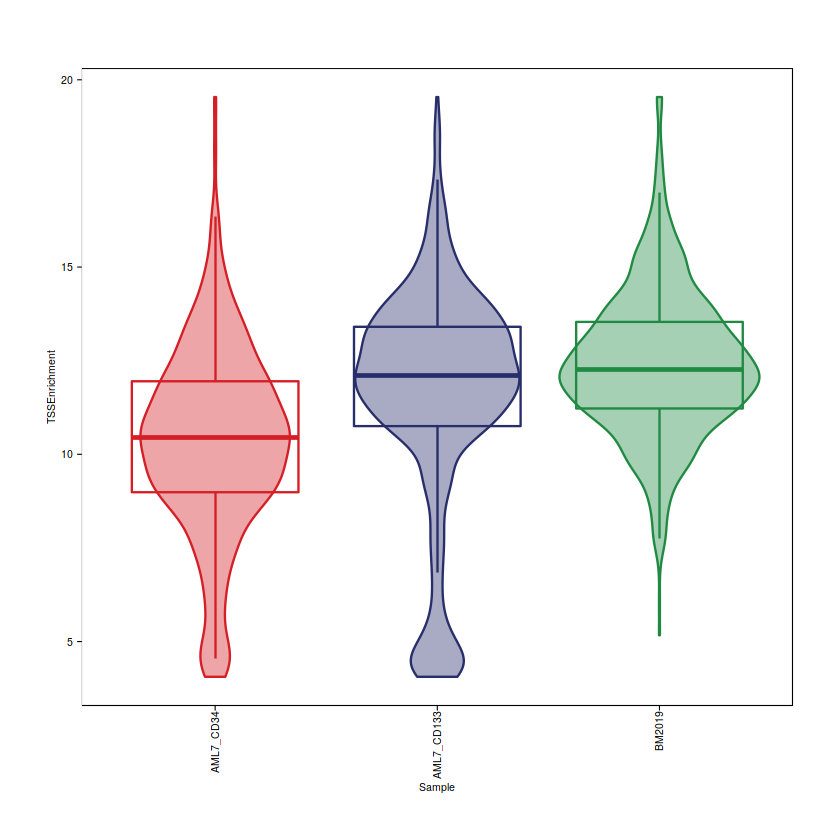

In [8]:
p2 <- plotGroups(
    ArchRProj = all_08H089_1, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "TSSEnrichment",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )
p2

1 


Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


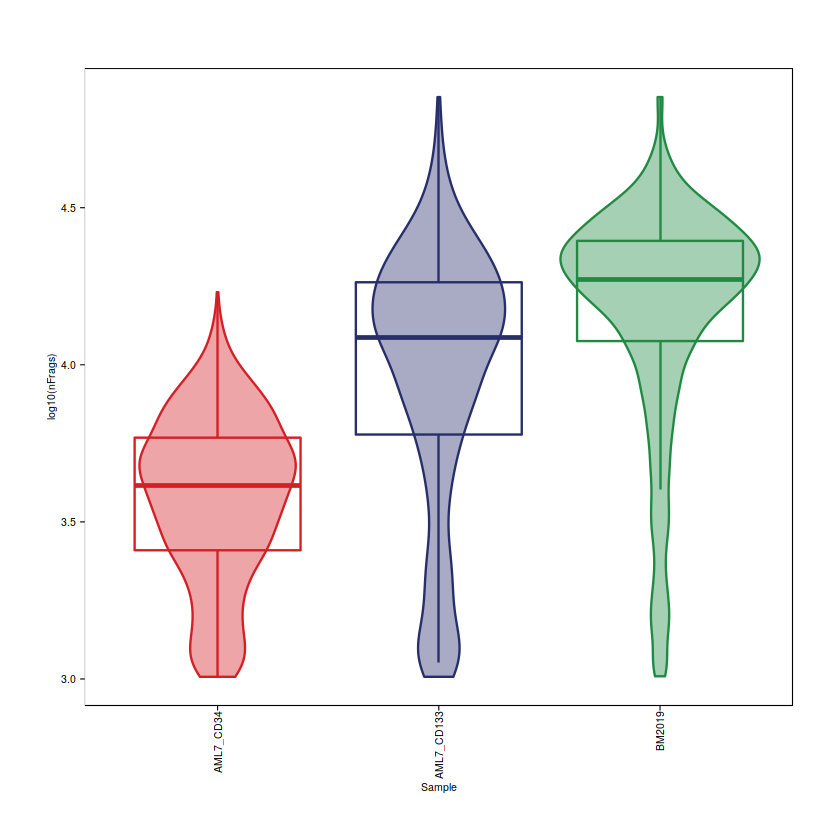

In [9]:
p4 <- plotGroups(
    ArchRProj = all_08H089_1, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "log10(nFrags)",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )
p4

In [10]:
install.packages("Seurat")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
library(Seurat)

In [12]:
projHeme2 <- addIterativeLSI(
    ArchRProj = all_08H089_1,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-8cc163c4f098-Date-2022-06-29_Time-21-40-27.log
If there is an issue, please report to github with logFile!

2022-06-29 21:40:28 : Computing Total Across All Features, 0.002 mins elapsed.

2022-06-29 21:40:36 : Computing Top Features, 0.133 mins elapsed.

###########
2022-06-29 21:40:38 : Running LSI (1 of 2) on Top Features, 0.163 mins elapsed.
###########

2022-06-29 21:40:38 : Sampling Cells (N = 10001) for Estimated LSI, 0.164 mins elapsed.

2022-06-29 21:40:38 : Creating Sampled Partial Matrix, 0.164 mins elapsed.

2022-06-29 21:41:06 : Computing Estimated LSI (projectAll = FALSE), 0.639 mins elapsed.

2022-06-29 21:42:43 : Identifying Clusters, 2.248 mins elapsed.

2022-06-29 21:43:01 : Identified 4 Clusters, 2.553 mins elapsed.

2022-06-29 21:43:01 : Saving LSI Iteration, 2.553 mins elapsed.

2022-06-29 21:43:33 : Creating Cluster Matrix on the total Group Features, 3.093 mins elapsed.

2022-06-29 21:44:40 : C

In [13]:
projHeme2 <- addHarmony(
    ArchRProj = projHeme2,
    reducedDims = "IterativeLSI",
    name = "Harmony",
    groupBy = "Sample"
)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1120200)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



In [14]:
projHeme2 <- addClusters(
    input = projHeme2,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Harmony_Clusters",
    resolution = 0.8,
    force=TRUE
)

ArchR logging to : ArchRLogs/ArchR-addClusters-8cc112ac9db6-Date-2022-06-29_Time-21-47-16.log
If there is an issue, please report to github with logFile!

2022-06-29 21:47:16 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22404
Number of edges: 701957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8459
Number of communities: 27
Elapsed time: 3 seconds


12 singletons identified. 15 final clusters.

2022-06-29 21:47:50 : Testing Biased Clusters, 0.565 mins elapsed.

2022-06-29 21:47:50 : Testing Outlier Clusters, 0.566 mins elapsed.

2022-06-29 21:47:50 : Assigning Cluster Names to 15 Clusters, 0.566 mins elapsed.

2022-06-29 21:47:50 : Finished addClusters, 0.569 mins elapsed.



In [15]:
projHeme2 <- addClusters(
    input = projHeme2,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "LSI_Clusters",
    resolution = 0.8,
    force=TRUE
)

ArchR logging to : ArchRLogs/ArchR-addClusters-8cc11da81632-Date-2022-06-29_Time-21-47-50.log
If there is an issue, please report to github with logFile!

2022-06-29 21:47:51 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22404
Number of edges: 776972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 39
Elapsed time: 4 seconds


23 singletons identified. 16 final clusters.

2022-06-29 21:48:28 : Testing Biased Clusters, 0.623 mins elapsed.

2022-06-29 21:48:28 : Testing Outlier Clusters, 0.624 mins elapsed.

2022-06-29 21:48:28 : Assigning Cluster Names to 16 Clusters, 0.624 mins elapsed.

2022-06-29 21:48:28 : Finished addClusters, 0.626 mins elapsed.



In [16]:
cM <- confusionMatrix(paste0(projHeme2$LSI_Clusters), paste0(projHeme2$Sample))

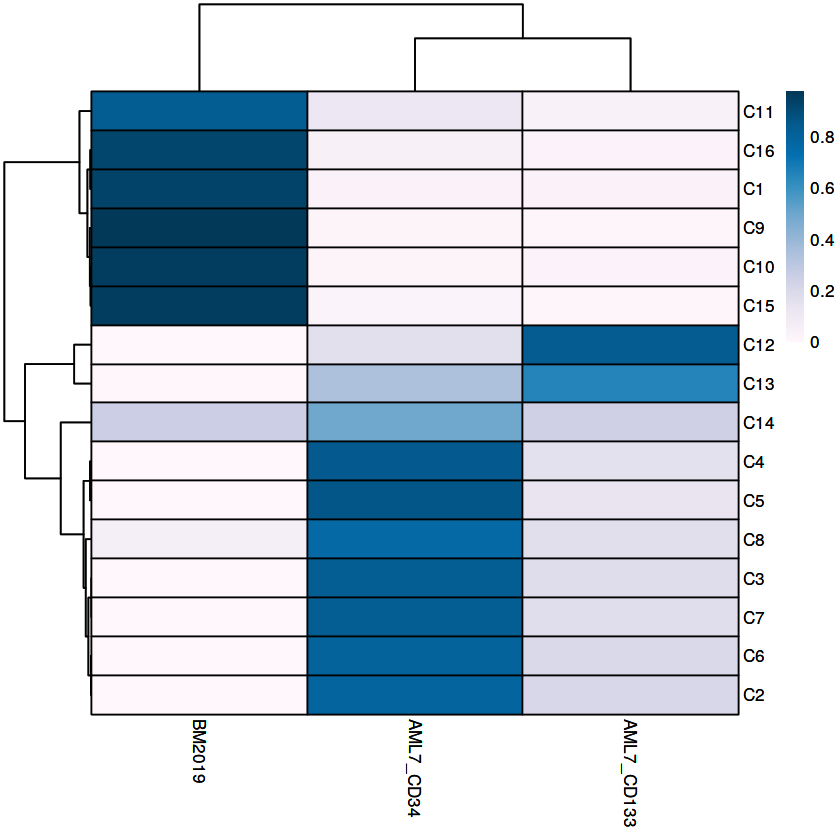

In [17]:
library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black"
)
p

In [18]:
#UMAP computed using LSI
projHeme2 <- addUMAP(
    ArchRProj = projHeme2, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force=TRUE
)

21:50:06 UMAP embedding parameters a = 0.583 b = 1.334

21:50:06 Read 22404 rows and found 30 numeric columns

21:50:06 Using Annoy for neighbor search, n_neighbors = 30

21:50:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:50:11 Writing NN index file to temp file /tmp/RtmpKgYQJz/file8cc17437e119

21:50:11 Searching Annoy index using 40 threads, search_k = 3000

21:50:11 Annoy recall = 100%

21:50:13 Commencing smooth kNN distance calibration using 40 threads

21:50:15 Initializing from normalized Laplacian + noise

21:50:16 Commencing optimization for 200 epochs, with 1101210 positive edges

21:50:44 Optimization finished

21:50:44 Creating temp model dir /tmp/RtmpKgYQJz/dir8cc135bdb4f5

21:50:44 Creating dir /tmp/RtmpKgYQJz/dir8cc135bdb4f5

21:50:46 Changing t

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-8cc166ac106-Date-2022-06-29_Time-21-50-47.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-8cc166ac106-Date-2022-06-29_Time-21-50-47.log



$Sample

$LSI_Clusters


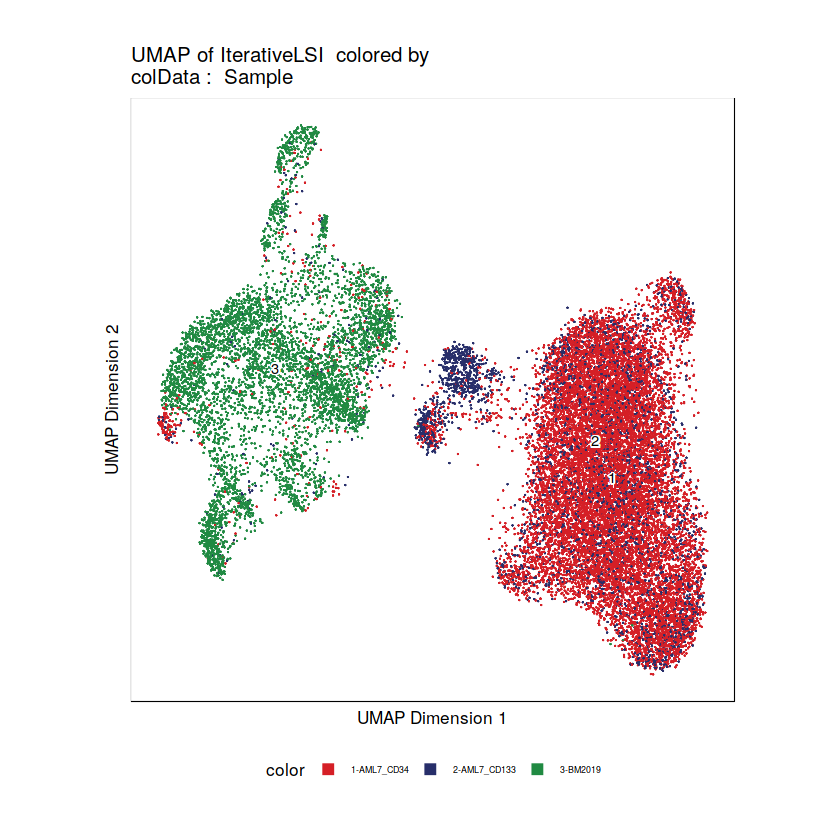

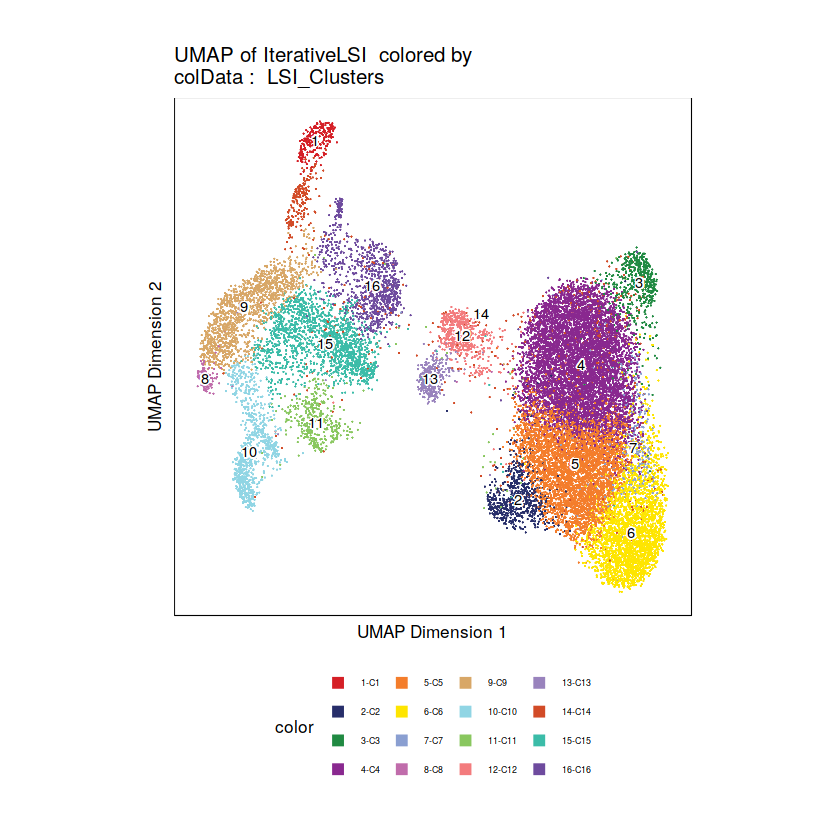

In [19]:
plotEmbedding(ArchRProj = projHeme2, colorBy = "cellColData", name = c("Sample","LSI_Clusters"), embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-8cc15b5f9bc6-Date-2022-06-29_Time-21-50-52.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-8cc15b5f9bc6-Date-2022-06-29_Time-21-50-52.log



$Sample

$Harmony_Clusters


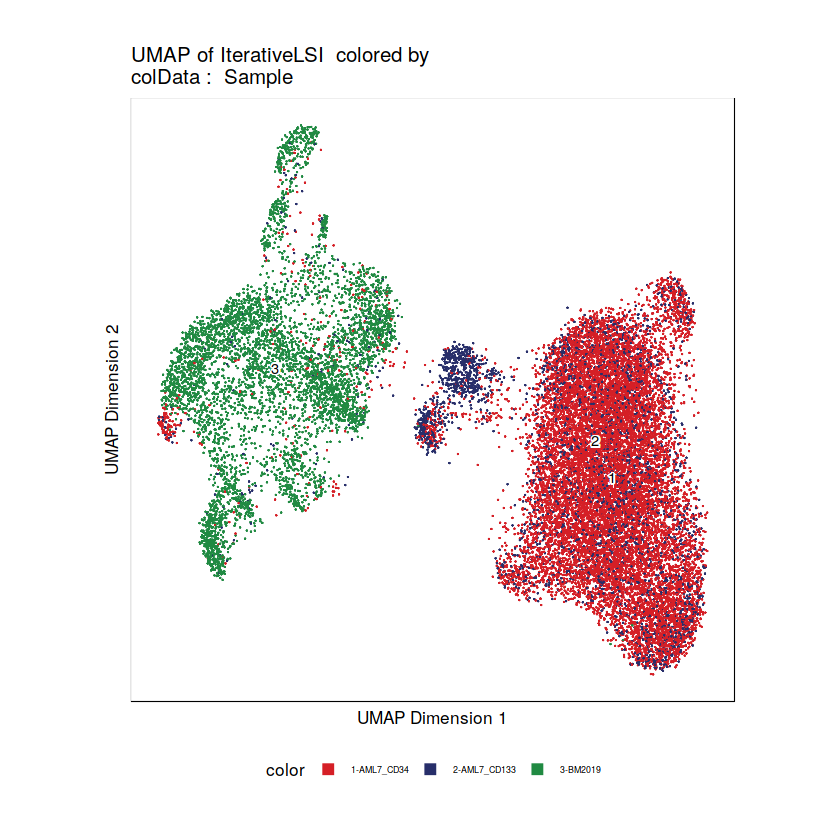

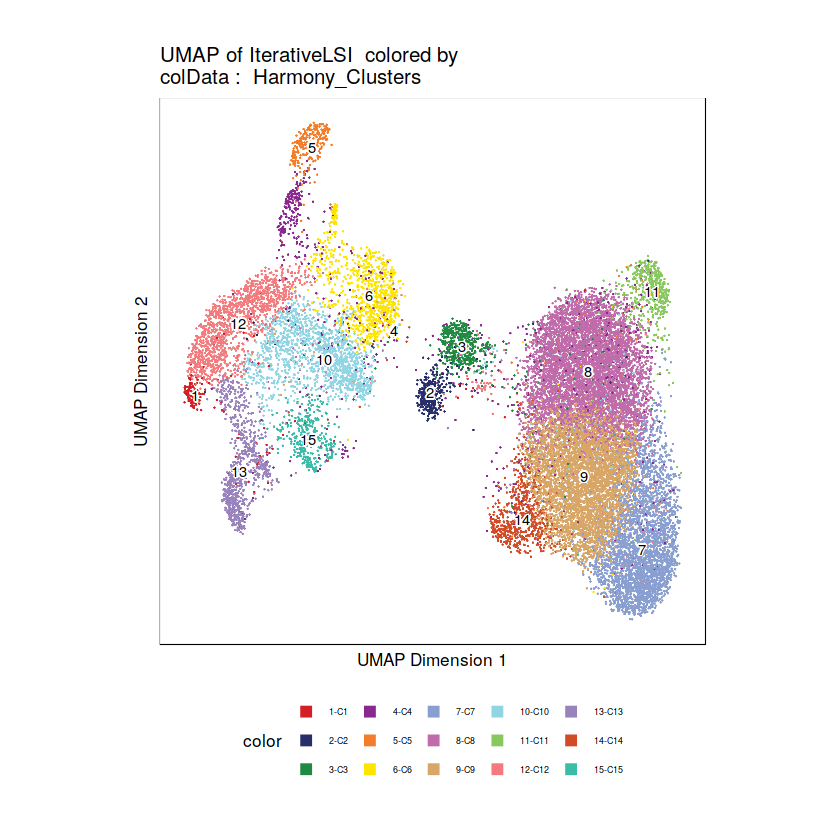

In [20]:
plotEmbedding(ArchRProj = projHeme2, colorBy = "cellColData", name = c("Sample","Harmony_Clusters"), embedding = "UMAP")

In [21]:
#UMAP using Harmony
projHeme2 <- addUMAP(
    ArchRProj = projHeme2, 
    reducedDims = "Harmony", 
    name = "UMAPHarmony", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force=TRUE
)

21:50:56 UMAP embedding parameters a = 0.583 b = 1.334

21:50:56 Read 22404 rows and found 30 numeric columns

21:50:56 Using Annoy for neighbor search, n_neighbors = 30

21:50:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:51:00 Writing NN index file to temp file /tmp/RtmpKgYQJz/file8cc130d5ea62

21:51:00 Searching Annoy index using 40 threads, search_k = 3000

21:51:01 Annoy recall = 100%

21:51:02 Commencing smooth kNN distance calibration using 40 threads

21:51:04 Initializing from normalized Laplacian + noise

21:51:05 Commencing optimization for 200 epochs, with 1091664 positive edges

21:51:33 Optimization finished

21:51:33 Creating temp model dir /tmp/RtmpKgYQJz/dir8cc13fd374a1

21:51:33 Creating dir /tmp/RtmpKgYQJz/dir8cc13fd374a1

21:51:35 Changing t

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-8cc13ee4b778-Date-2022-06-29_Time-21-51-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-8cc13ee4b778-Date-2022-06-29_Time-21-51-36.log



$Sample

$LSI_Clusters


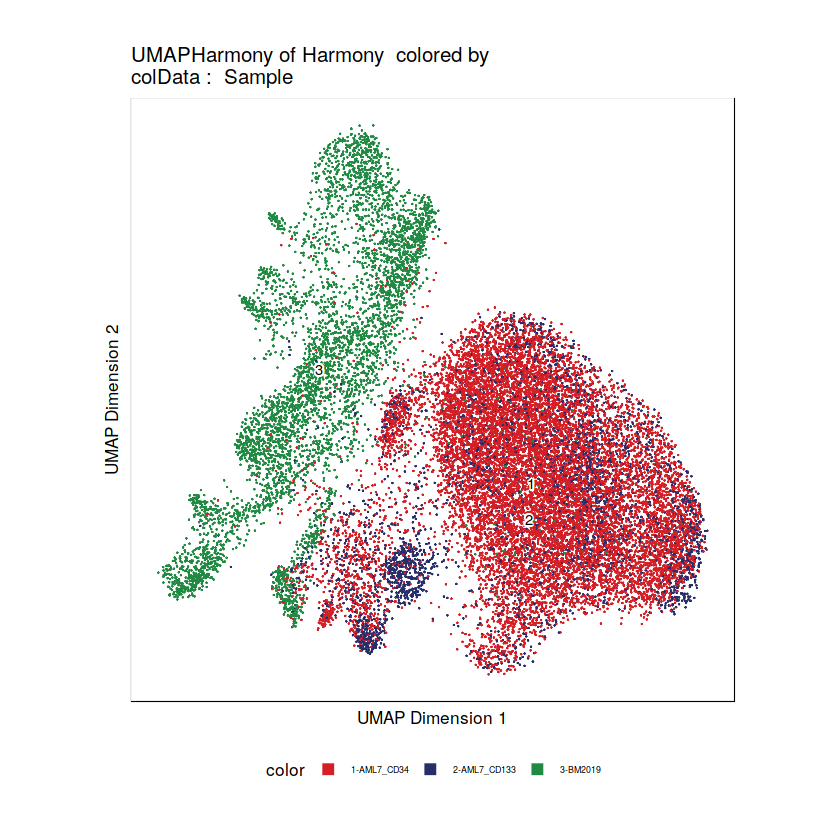

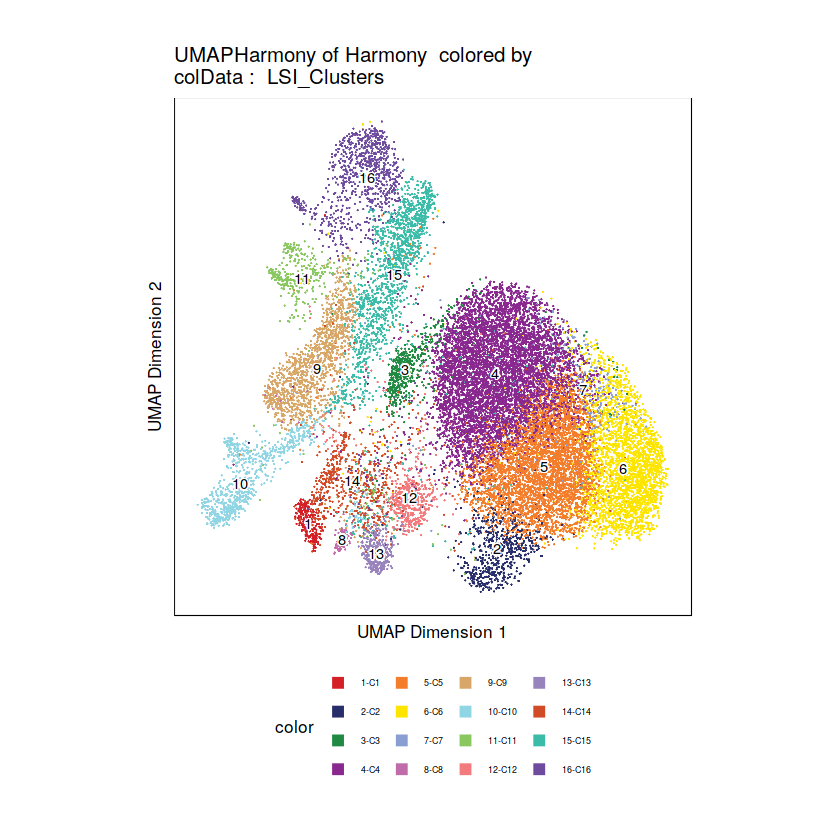

In [22]:
plotEmbedding(ArchRProj = projHeme2, colorBy = "cellColData", name = c("Sample","LSI_Clusters"), embedding = "UMAPHarmony")

In [35]:
tfs  <- c(
    'AHR','ARID5B','ATF4','BACH1','BCL6','BHLHE40','CEBPB','CEBPD',
    'CREB3L2','DDIT3','DNMT1','ELF1','ELF2','FLI1','FOSL2','FOXO1',
    'HES4','HIC1','HIF1A','HLX','HOXA3','HOXA9','HOXB2','HOXB3','IKZF1',
    'JUND','KLF2','KLF4','KLF6','LCOR','MAFB','MAFF','MAFK','MAX','MXD1',
    'MYBL2','MYC','NFAT5','NFKB2','NR4A1','NR4A2','NR4A3','PBX3','POU2F2',
    'PRDM1','RARA','RELB','RFX2','RUNX1','RUNX3','RXRA','SMAD3','STAT3','TP53',
    'ZBTB43','ZEB2','ZNF254','ZNF267','ZNF880','ZZZ3'
  )

In [23]:
markerGenes  <- c(
    "AVP","CD34", "PROM1","NPM1","MPO","LYZ","GATA1","CD19"
  )

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-8cc14c7f6b51-Date-2022-06-29_Time-22-05-41.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-8cc14c7f6b51-Date-2022-06-29_Time-22-05-41.log



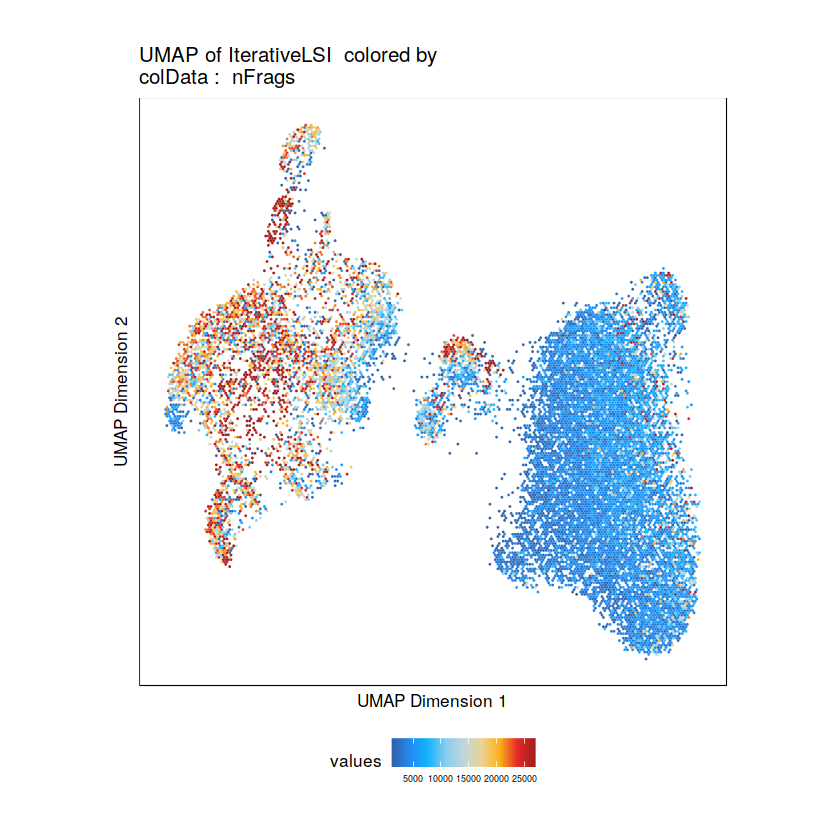

In [25]:
plotEmbedding(
    ArchRProj = projHeme2, 
    colorBy = "cellColData", 
    name = c("nFrags"), 
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)

In [27]:
write.csv(projHeme2@cellColData$nFrags,"BM_7_MERGE_nFrags.csv")

In [28]:
p <- plotEmbedding(
    ArchRProj = projHeme2, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-8cc137e3d9bc-Date-2022-06-29_Time-22-08-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-06-29 22:08:36 : 

1 
2 
3 


Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-8cc137e3d9bc-Date-2022-06-29_Time-22-08-36.log



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


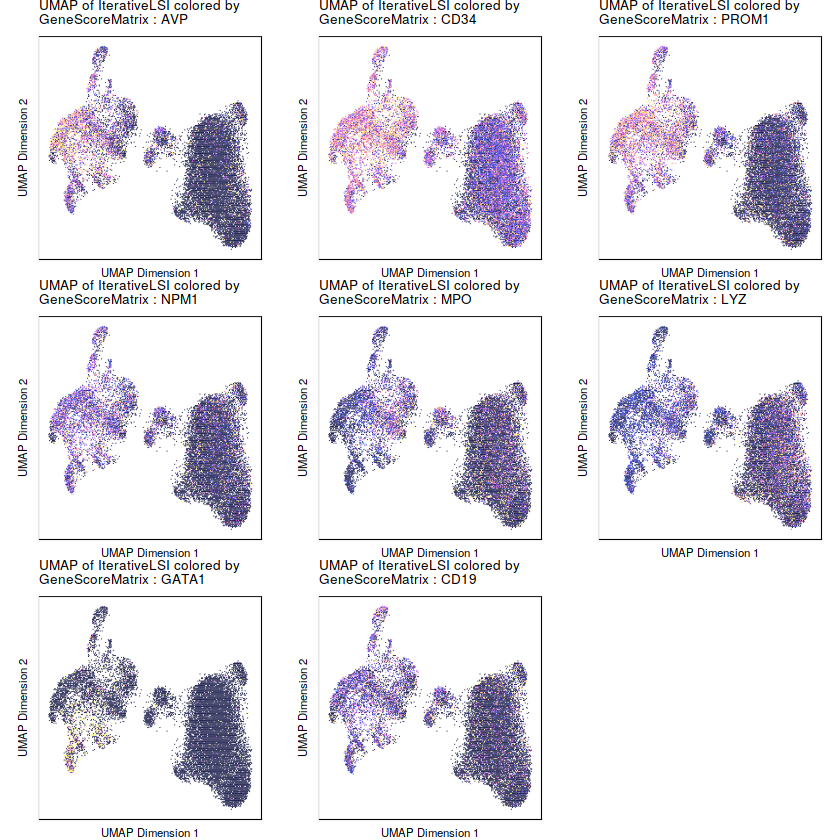

In [29]:
p2<-lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

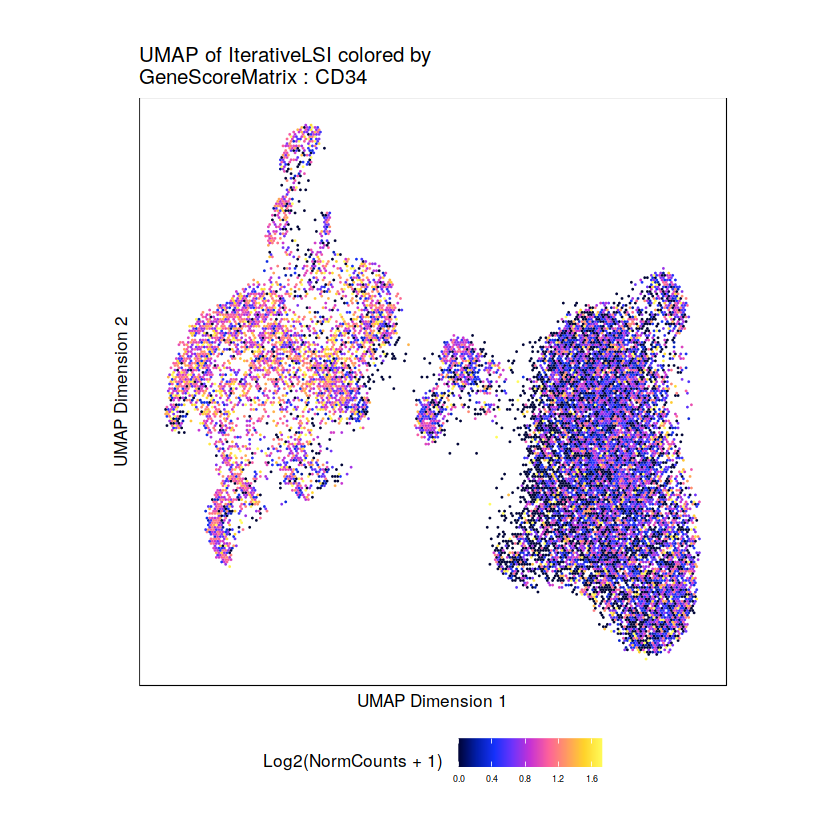

In [30]:
p$'CD34'

In [31]:
pathToMacs2 <- findMacs2()

Searching For MACS2..

Found with $path!



In [32]:
projHeme2 <- addGroupCoverages(ArchRProj = projHeme2, groupBy = "LSI_Clusters")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-8cc130d4bd2c-Date-2022-06-29_Time-22-11-53.log
If there is an issue, please report to github with logFile!

C1 (1 of 16) : CellGroups N = 2

C2 (2 of 16) : CellGroups N = 2

C3 (3 of 16) : CellGroups N = 2

C4 (4 of 16) : CellGroups N = 2

C5 (5 of 16) : CellGroups N = 2

C6 (6 of 16) : CellGroups N = 2

C7 (7 of 16) : CellGroups N = 2

C8 (8 of 16) : CellGroups N = 2

C9 (9 of 16) : CellGroups N = 2

C10 (10 of 16) : CellGroups N = 2

C11 (11 of 16) : CellGroups N = 2

C12 (12 of 16) : CellGroups N = 2

C13 (13 of 16) : CellGroups N = 2

C14 (14 of 16) : CellGroups N = 3

C15 (15 of 16) : CellGroups N = 2

C16 (16 of 16) : CellGroups N = 2

2022-06-29 22:11:55 : Creating Coverage Files!, 0.035 mins elapsed.

2022-06-29 22:11:55 : Batch Execution w/ safelapply!, 0.035 mins elapsed.

2022-06-29 22:11:55 : Group C1._.Rep1 (1 of 33) : Creating Group Coverage File : C1._.Rep1.insertions.coverage.h5, 0.035 mins elapsed.

Number of Cells =

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2022-06-29 22:27:21 : Group C13._.AML7_CD133 (25 of 33) : Creating Group Coverage File : C13._.AML7_CD133.insertions.coverage.h5, 15.46 mins elapsed.

Number of Cells = 233

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2022-06-29 22:27:57 : Group C13._.AML7_CD34 (26 of 33) : Creating Group Coverage File : C13._.AML7_CD34.insertions.coverage.h5, 16.058 mins elapsed.

Number of Cells = 123

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2022-06-29 22:28:31 : Group C14._.AML7_CD34 (27 of 33) : Creating Group Coverage File : C14._.AML7_CD34.insertions.coverage.h5, 16.633 mins elapsed.

Number of Cells = 315

Coverage File Exists!

Added Coverage Grou

Coverage File chr13 (26 of 33)

Coverage File chr13 (27 of 33)

Coverage File chr13 (28 of 33)

Coverage File chr13 (29 of 33)

Coverage File chr13 (30 of 33)

Coverage File chr13 (31 of 33)

Coverage File chr13 (32 of 33)

Coverage File chr13 (33 of 33)

Kmer Bias chr14 (6 of 24)

chr14 
Coverage File chr14 (1 of 33)

Coverage File chr14 (2 of 33)

Coverage File chr14 (3 of 33)

Coverage File chr14 (4 of 33)

Coverage File chr14 (5 of 33)

Coverage File chr14 (6 of 33)

Coverage File chr14 (7 of 33)

Coverage File chr14 (8 of 33)

Coverage File chr14 (9 of 33)

Coverage File chr14 (10 of 33)

Coverage File chr14 (11 of 33)

Coverage File chr14 (12 of 33)

Coverage File chr14 (13 of 33)

Coverage File chr14 (14 of 33)

Coverage File chr14 (15 of 33)

Coverage File chr14 (16 of 33)

Coverage File chr14 (17 of 33)

Coverage File chr14 (18 of 33)

Coverage File chr14 (19 of 33)

Coverage File chr14 (20 of 33)

Coverage File chr14 (21 of 33)

Coverage File chr14 (22 of 33)

Coverage File c

Coverage File chr20 (13 of 33)

Coverage File chr20 (14 of 33)

Coverage File chr20 (15 of 33)

Coverage File chr20 (16 of 33)

Coverage File chr20 (17 of 33)

Coverage File chr20 (18 of 33)

Coverage File chr20 (19 of 33)

Coverage File chr20 (20 of 33)

Coverage File chr20 (21 of 33)

Coverage File chr20 (22 of 33)

Coverage File chr20 (23 of 33)

Coverage File chr20 (24 of 33)

Coverage File chr20 (25 of 33)

Coverage File chr20 (26 of 33)

Coverage File chr20 (27 of 33)

Coverage File chr20 (28 of 33)

Coverage File chr20 (29 of 33)

Coverage File chr20 (30 of 33)

Coverage File chr20 (31 of 33)

Coverage File chr20 (32 of 33)

Coverage File chr20 (33 of 33)

Kmer Bias chr21 (14 of 24)

chr21 
Coverage File chr21 (1 of 33)

Coverage File chr21 (2 of 33)

Coverage File chr21 (3 of 33)

Coverage File chr21 (4 of 33)

Coverage File chr21 (5 of 33)

Coverage File chr21 (6 of 33)

Coverage File chr21 (7 of 33)

Coverage File chr21 (8 of 33)

Coverage File chr21 (9 of 33)

Coverage File 

Coverage File chr8 (4 of 33)

Coverage File chr8 (5 of 33)

Coverage File chr8 (6 of 33)

Coverage File chr8 (7 of 33)

Coverage File chr8 (8 of 33)

Coverage File chr8 (9 of 33)

Coverage File chr8 (10 of 33)

Coverage File chr8 (11 of 33)

Coverage File chr8 (12 of 33)

Coverage File chr8 (13 of 33)

Coverage File chr8 (14 of 33)

Coverage File chr8 (15 of 33)

Coverage File chr8 (16 of 33)

Coverage File chr8 (17 of 33)

Coverage File chr8 (18 of 33)

Coverage File chr8 (19 of 33)

Coverage File chr8 (20 of 33)

Coverage File chr8 (21 of 33)

Coverage File chr8 (22 of 33)

Coverage File chr8 (23 of 33)

Coverage File chr8 (24 of 33)

Coverage File chr8 (25 of 33)

Coverage File chr8 (26 of 33)

Coverage File chr8 (27 of 33)

Coverage File chr8 (28 of 33)

Coverage File chr8 (29 of 33)

Coverage File chr8 (30 of 33)

Coverage File chr8 (31 of 33)

Coverage File chr8 (32 of 33)

Coverage File chr8 (33 of 33)

Kmer Bias chr9 (22 of 24)

chr9 
Coverage File chr9 (1 of 33)

Coverage File

In [33]:
projHeme2 <- addReproduciblePeakSet(
    ArchRProj = projHeme2, 
    groupBy = "LSI_Clusters", 
    pathToMacs2 = pathToMacs2
)

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-8cc11539b7ec-Date-2022-06-29_Time-22-51-30.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2022-06-29 22:51:30 : Peak Calling Parameters!, 0.004 mins elapsed.



    Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
C1     C1    238        238           2   40  198   119000
C2     C2    647        634           2  134  500   150000
C3     C3    536        536           2   94  442   150000
C4     C4   6582       1000           2  500  500   150000
C5     C5   4403       1000           2  500  500   150000
C6     C6   2896       1000           2  500  500   150000
C7     C7    284        284           2   49  235   142000
C8     C8    121        121           2   40   81    60500
C9     C9   1357        540           2   40  500   150000
C10   C10    869        540           2   40  500   150000
C11   C11    395        377           2   48  329   150000
C12   C12    559        559           2   91  468   150000
C13   C13    358        356           2  123  233   150000
C14   C14    633        633           3  156  315   150000
C15   C15   1586        548           2   48  500   150000
C16   C16    940        548           2   48  500   1500

2022-06-29 22:51:30 : Batching Peak Calls!, 0.004 mins elapsed.

2022-06-29 22:51:30 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-06-29 22:51:30 : Group 1 of 33, Calling Peaks with MACS2!, 0 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 2.7e+09 --name C1._.Rep1-1 --treatment /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds/C1._.Rep1-1.insertions.bed --outdir /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2022-06-29 22:52:45 : Group 2 of 33, Calling Peaks with MACS2!, 1.248 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 2.7e+09 --name C1._.Rep2-2 --treatment /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds/C1._.Rep2-2.insertions.bed --outdir /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --

2022-06-29 23:11:14 : Group 19 of 33, Calling Peaks with MACS2!, 19.745 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 2.7e+09 --name C10._.BM2019-19 --treatment /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds/C10._.BM2019-19.insertions.bed --outdir /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2022-06-29 23:13:33 : Group 20 of 33, Calling Peaks with MACS2!, 22.048 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 2.7e+09 --name C10._.1-20 --treatment /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds/C10._.1-20.insertions.bed --outdir /home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2022-06-29 23:13:49 : Group 21 of 33, Calling Peaks with MACS2!, 22.325 mins elapsed.

Running Macs2 w

[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C1-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C10-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C11-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C12-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C13-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C14-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C15-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C16-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C2-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C3-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C4-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C5-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C6-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C7-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C8-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/lf2684/R_notebooks/ARCHR/outputs_merge7/PeakCalls/C9-reproduciblePeaks.gr.rds"


2022-06-29 23:30:21 : Creating Union Peak Set!, 38.855 mins elapsed.

Converged after 7 iterations!

Plotting Ggplot!

2022-06-29 23:30:29 : Finished Creating Union Peak Set (183768)!, 38.99 mins elapsed.



In [34]:
fin_08H089 <- addPeakMatrix(projHeme2)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-8cc16f703acd-Date-2022-06-29_Time-23-30-29.log
If there is an issue, please report to github with logFile!

2022-06-29 23:30:29 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-06-29 23:30:30 : Adding BM2019 to PeakMatrix for Chr (1 of 23)!, 0.01 mins elapsed.

2022-06-29 23:30:42 : Adding BM2019 to PeakMatrix for Chr (2 of 23)!, 0.211 mins elapsed.

2022-06-29 23:30:50 : Adding BM2019 to PeakMatrix for Chr (3 of 23)!, 0.347 mins elapsed.

2022-06-29 23:30:57 : Adding BM2019 to PeakMatrix for Chr (4 of 23)!, 0.466 mins elapsed.

2022-06-29 23:31:03 : Adding BM2019 to PeakMatrix for Chr (5 of 23)!, 0.559 mins elapsed.

2022-06-29 23:31:09 : Adding BM2019 to PeakMatrix for Chr (6 of 23)!, 0.659 mins elapsed.

2022-06-29 23:31:15 : Adding BM2019 to PeakMatrix for Chr (7 of 23)!, 0.773 mins elapsed.

2022-06-29 23:31:22 : Adding BM2019 to PeakMatrix for Chr (8 of 23)!, 0.877 mins elapsed.

2022-06-29 23:31:27 : Adding BM2019 to PeakMa

In [35]:
saveArchRProject(ArchRProj = projHeme2, outputDirectory = "outputs_merge7", load = FALSE)

Saving ArchRProject...



In [37]:
proj<-loadArchRProject(path = "outputs_merge7", force = FALSE, showLogo = TRUE)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [38]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "LSI_Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-8cc1339ba593-Date-2022-06-29_Time-23-43-17.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2022-06-29 23:43:17 : Matching Known Biases, 0.003 mins elapsed.

2022-06-29 23:43:21 : Computing Pairwise Tests (1 of 16), 0.079 mins elapsed.

Pairwise Test C1 : Seqnames chr1

Pairwise Test C1 : Seqnames chr10

Pairwise Test C1 : Seqnames chr11

Pairwise Test C1 : Seqnames chr12

Pairwise Test C1 : Seqnames chr13

Pairwise Test C1 : Seqnames chr14

Pairwise Test C1 : Seqnames chr15

Pairwise Test C1 : Seqnames chr16

Pairwise Test C1 : Seqnames chr17

Pairwise Test C1 : Seqnames chr18

Pairwise Test C1 : Seqnames chr19

Pairwise Test C1 : Seqnames chr2

Pairwise Test C1 : Seqnames chr20



In [39]:
# Peak counts
peaks <- getPeakSet(proj)
peak.counts <- getMatrixFromProject(proj, 'PeakMatrix')
# Reorder peaks 

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-8cc17be745fc-Date-2022-06-29_Time-23-43-48.log
If there is an issue, please report to github with logFile!

2022-06-29 23:45:07 : Organizing colData, 1.307 mins elapsed.

2022-06-29 23:45:07 : Organizing rowData, 1.308 mins elapsed.

2022-06-29 23:45:07 : Organizing rowRanges, 1.308 mins elapsed.

2022-06-29 23:45:07 : Organizing Assays (1 of 1), 1.308 mins elapsed.

2022-06-29 23:45:12 : Constructing SummarizedExperiment, 1.399 mins elapsed.

2022-06-29 23:45:14 : Finished Matrix Creation, 1.422 mins elapsed.



In [40]:
# Chromosome order
chr_order <- sort(seqlevels(peaks))
reordered_features <- list()
for(chr in chr_order)
    reordered_features[[chr]] = peaks[seqnames(peaks) == chr]
reordered_features <- Reduce("c", reordered_features)    

In [41]:
# Export counts
proj_name <- "MERGED_PEER"
counts <- assays(peak.counts)[['PeakMatrix']]
writeMM(counts, sprintf('%s/AML7_MERGE_counts.mtx', proj_name))
write.csv(colnames(peak.counts), sprintf('%s/AML7_MERGE_cells.csv', proj_name), quote=FALSE)
names(reordered_features) <- sprintf("Peak%d", 1:length(reordered_features))
write.csv(as.data.frame(reordered_features), sprintf('%s/AML7_MERGE_peaks.csv', proj_name), quote=FALSE)

NULL

In [42]:
write.csv(getReducedDims(proj), sprintf('%s/AML7_MERGE_svd.csv', proj_name), quote=FALSE)
write.csv(getEmbedding(proj), sprintf('%s/AML7_MERGE_umap.csv', proj_name), quote=FALSE)
write.csv(getCellColData(proj), sprintf('%s/AML7_MERGE_cell_metadata.csv', proj_name), quote=FALSE)

In [ ]:
#proj <- addGeneScoreMatrix(proj, matrixName='GeneScoreMatrix', force=TRUE)

In [43]:
# Gene scores
gene.scores <- getMatrixFromProject(proj,useMatrix = "GeneScoreMatrix")
scores <- assays(gene.scores)[['GeneScoreMatrix']]
scores <- as.matrix(scores)
rownames(scores) <- rowData(gene.scores)$name
write.csv(scores, sprintf('%s/AML7_MERGE_all_cells_gene_scores.csv', proj_name), quote=FALSE)

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-8cc15d9f1bd9-Date-2022-06-29_Time-23-46-01.log
If there is an issue, please report to github with logFile!

2022-06-29 23:47:29 : Organizing colData, 1.454 mins elapsed.

2022-06-29 23:47:29 : Organizing rowData, 1.454 mins elapsed.

2022-06-29 23:47:29 : Organizing rowRanges, 1.455 mins elapsed.

2022-06-29 23:47:29 : Organizing Assays (1 of 1), 1.455 mins elapsed.

2022-06-29 23:47:36 : Constructing SummarizedExperiment, 1.576 mins elapsed.

2022-06-29 23:47:37 : Finished Matrix Creation, 1.601 mins elapsed.



In [5]:
if("Motif" %ni% names(proj@peakAnnotation)){
    proj <- addMotifAnnotations(ArchRProj = proj, motifSet = "JASPAR2020", name = "Motif")
}

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-4a7b11f8bde4-Date-2022-04-01_Time-01-27-24.log
If there is an issue, please report to github with logFile!

2022-04-01 01:27:28 : Gettting Motif Set, Species : Homo sapiens, 0.002 mins elapsed.

2022-04-01 01:27:38 : Finding Motif Positions with motifmatchr!, 0.173 mins elapsed.

2022-04-01 01:30:24 : Creating Motif Overlap Matrix, 2.938 mins elapsed.

2022-04-01 01:30:27 : Finished Getting Motif Info!, 2.984 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-4a7b11f8bde4-Date-2022-04-01_Time-01-27-24.log



In [6]:
proj <- addBgdPeaks(proj)

Identifying Background Peaks!



In [7]:
proj <- addDeviationsMatrix(
  ArchRProj = proj, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-4a7b65580230-Date-2022-04-01_Time-01-30-44.log
If there is an issue, please report to github with logFile!



NULL


2022-04-01 01:30:48 : Batch Execution w/ safelapply!, 0 mins elapsed.

Can not create group. Object with name 'MotifMatrix' already exists.

2022-04-01 01:30:49 : chromVAR deviations BM2019 (1 of 3) Schep (2017), 0.016 mins elapsed.

2022-04-01 01:32:35 : BM2019 (1 of 3) : Deviations for Annotation 31 of 633, 1.343 mins elapsed.

2022-04-01 01:34:06 : BM2019 (1 of 3) : Deviations for Annotation 62 of 633, 2.855 mins elapsed.

2022-04-01 01:35:08 : BM2019 (1 of 3) : Deviations for Annotation 93 of 633, 3.881 mins elapsed.

2022-04-01 01:36:13 : BM2019 (1 of 3) : Deviations for Annotation 124 of 633, 4.961 mins elapsed.

2022-04-01 01:37:12 : BM2019 (1 of 3) : Deviations for Annotation 155 of 633, 5.958 mins elapsed.

2022-04-01 01:38:25 : BM2019 (1 of 3) : Deviations for Annotation 186 of 633, 7.172 mins elapsed.

2022-04-01 01:39:33 : BM2019 (1 of 3) : Deviations for Annotation 217 of 633, 8.305 mins elapsed.

2022-04-01 01:40:44 : BM2019 (1 of 3) : Deviations for Annotation 248 of 633